In [680]:
import numpy as np
import copy
import colorama
from colorama import Fore, Style
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Activation Functions

In [601]:
#List of activation functions
activation_functions = list()

#### SIGMOID

In [602]:
# Sigmoid Function
def sigmoid(net):
    """
    Args:
        net (numpy array): matrix of net for all inputs
    
    Returns:
        ret (numpy array): matrix of sigmoid of all elements in net 
    """
        
    ret = 1/(1+np.exp(-net))
    return ret

activation_functions.append(sigmoid)

In [603]:
#TEST SIGMOID
print(sigmoid(6))

0.9975273768433653


#### RELU

In [604]:
# Rectified Linear Unit
def relu(net):
    """
    Args:
        net (numpy array): numpy array of nets
    
    Return:
        ret (numpy array): matrix of relu of all elements in net 
    """
    
    ret = np.maximum(net, 0) #https://stackoverflow.com/questions/33569668/numpy-max-vs-amax-vs-maximum
    return ret

activation_functions.append(relu)

In [605]:
#TEST RELU
net  = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]])
print(relu(net))

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 0 0 0 0 0 0 0 0 0]]


#### SOFTMAX (note this will be used only in the last layer of a NN)

In [606]:
# Softmax
def softmax(net):
    """
    Args:
        net (numpy array): matrix of net for all inputs
    
    Returns:
        ret (numpy array): matrix of softmax of all elements in net 
    """
    
    e_net = np.exp(net)
    sum_e_net = np.sum(e_net, axis = 0)
    ret = e_net / sum_e_net # broadcast division
    return  ret


activation_functions.append(softmax)

In [607]:
# TEST SOFTMAX (n x 1 dim)
lst = [0,1,2,3,4,5]
net = np.asarray(lst).reshape(6,1)

tot = 0
for i in range(len(lst)):
    e_x = np.exp(lst[i])
    lst[i] = e_x
    tot = tot + e_x

for i in range(len(lst)):
    lst[i] = lst[i]/tot
    
print(np.asarray(lst).reshape(6,1))
print("--------------------")
print(softmax(net))


[[0.00426978]
 [0.01160646]
 [0.03154963]
 [0.08576079]
 [0.23312201]
 [0.63369132]]
--------------------
[[0.00426978]
 [0.01160646]
 [0.03154963]
 [0.08576079]
 [0.23312201]
 [0.63369132]]


In [608]:
# TEST SOFTMAX (m x n)
lst = [[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5]]
net = np.transpose(np.asarray(lst))

lst_tot = list()
for i in range(len(lst)):
    tot = 0
    for j in range(len(lst[i])):
        
        e_x = np.exp(lst[i][j])
        lst[i][j] = e_x
        tot = tot + e_x
    lst_tot.append(tot)
        
        
# print(np.asarray(lst_tot))

for i in range(len(lst)):
    tot = 0
    for j in range(len(lst[i])):
        lst[i][j] = lst[i][j] / lst_tot[i]
        
    
print(np.transpose(np.asarray(lst)))
print("------------------------------------------")
print(softmax(net))


[[0.00426978 0.00426978 0.00426978]
 [0.01160646 0.01160646 0.01160646]
 [0.03154963 0.03154963 0.03154963]
 [0.08576079 0.08576079 0.08576079]
 [0.23312201 0.23312201 0.23312201]
 [0.63369132 0.63369132 0.63369132]]
------------------------------------------
[[0.00426978 0.00426978 0.00426978]
 [0.01160646 0.01160646 0.01160646]
 [0.03154963 0.03154963 0.03154963]
 [0.08576079 0.08576079 0.08576079]
 [0.23312201 0.23312201 0.23312201]
 [0.63369132 0.63369132 0.63369132]]


# Define & Initialize parameters of the NN

#### Helper Functions

In [609]:
#check if last choice is valid i.e. sigmoid for one or softmax for more than two 
# also restrict last layer output to 1 or more than 2
def check_params(params):
    flag = True
    
    # If lenght is less than 1 raise flag
    if len(params) < 1:
        flag = False
        return flag
    
    # if length is exactly 1
    if len(params) == 1 :
        # len == 3, first two is int and last is a function
        if len(params[0]) == 3 :
            if not isinstance(params[0][0],int) or not isinstance(params[0][1],int):
                print(Fore.RED+"Dimensions should be int!!"+Style.RESET_ALL)
                flag = False
                return flag
            if params[0][2] not in activation_functions:
                print(Fore.RED+"Not an activation function!!"+Style.RESET_ALL)
                flag = False
                return flag

        else:
            flag = False
            return flag
    # if length greater than 1
    else:    
        # If length of each list inside params are not equal then raise flag
        '''
        for finding if every element is same in a list
        https://stackoverflow.com/questions/3844801/check-if-all-elements-in-a-list-are-identical/3844832#3844832
        '''
        convert_set = set(map(len, params)) # map with length and convert to set BEING LAZY
        if len(convert_set) != 1:
            print(Fore.RED+"Each list of param must be of size 3!!"+Style.RESET_ALL)
            flag = False
            return flag

        # If dimensions mismatch raise flag
        index = 0
        while(True):
            if not isinstance(params[index][0],int) or not isinstance(params[index][1],int):
                print(Fore.RED+"Dimensions should be int!!"+ " Check arg at index " + str(index)+"!!"+Style.RESET_ALL)
                flag = False
                return flag
            
            if not isinstance(params[index+1][0],int) or not isinstance(params[index+1][1],int):
                print(Fore.RED+"Dimensions should be int!!"+ " Check arg at index " + str(index)+"!!"+Style.RESET_ALL)
                flag = False
                return flag
            
            if params[index][1] != params[index+1][0]:
                print(Fore.RED+"Dimension Mismatch!!" + " Check arg at index " + str(index)+"!!" + " and " + 
                      str(index+1)+"!!"+Style.RESET_ALL)
                flag = False
                return flag
            index = index + 1
            if index == len(params)-1:
                break
                
        # all are valid functions in 3rd place
        for index in range(len(params)):
            if params[index][2] not in activation_functions:
                print(Fore.RED+"Not an activation function!!" + " Check arg at index " + str(index)+"!!"+Style.RESET_ALL)
                flag = False
                return flag
        
    return flag
        

In [610]:
# TEST check_params()
params_1 = []
params_2 = [[]]
params_3 = [[12,"s",sigmoid]]
params_4 = [[12,12,13]]
params_5 = [[12,10,relu]]
params_6 = [[12,10,relu],[10,12,sigmoid]]
params_7 = [[12,10,relu],[11,12,sigmoid]]
params_8 = [[12,10,relu],[12,sigmoid]]

print(check_params(params_1))
print(check_params(params_2))
print(check_params(params_3))
print(check_params(params_4))
print(check_params(params_5))
print(check_params(params_6))
print(check_params(params_7))
print(check_params(params_8))

False
False
Dimensions should be int!!
False
Not an activation function!!
False
True
True
Dimension Mismatch!! Check arg at index 0!! and 1!!
False
Each list of param must be of size 3!!
False


#### Function initialize_nn_parameters()

In [611]:
def initialize_nn_parameters(params):
    
    """Initializes the weights and biases of the neural network
    Args:
        params (list of lists): A list of lists where each list represents a layer in the neural network.
                               The lists must have follwing format
                               [dimension_input, dimension_output, activation_function]
    Returns:
        deep_parameters (dictionary): A dictionary of initialized parameters for the neural network as defined 
    """
    if not check_params(params):
        print(Fore.RED+"ERROR IN PARAMS!!"+Style.RESET_ALL)
        pass
    
    deep_parameters = dict()
    
    count = 0
    for layers in params:
        '''
        note the dimension of weight matrix for a layer with (n input and m output)
        will be (n x m) 
        and dimension of the bias will be (m x 1)
        '''
        #arXiv:1704.08863v2 [cs.LG] 2 May 2017 On weight initialization in deep neural networks Siddharth Krishna Kumar
        deep_parameters["weights_" + str(count+1)] = (np.random.randn(layers[1], layers[0])) *  np.sqrt(2.0/layers[0])
        deep_parameters["bias_" + str(count+1)] = np.zeros((layers[1],1))
        deep_parameters["activation_" + str(count+1)] = layers[2]
        
        #dimensions sanity check
        assert (deep_parameters["weights_" + str(count+1)].shape == (layers[1], layers[0]))
        assert (deep_parameters["bias_" + str(count+1)].shape == (layers[1], 1))
        
        count = count + 1
        
    return deep_parameters
        

In [612]:
def initialize_nn_parameters(params):
    
    """Initializes the weights and biases of the neural network
    Args:
        params (list of lists): A list of lists where each list represents a layer in the neural network.
                               The lists must have follwing format
                               [dimension_input, dimension_output, activation_function]
    Returns:
        deep_parameters (dictionary): A dictionary of initialized parameters for the neural network as defined 
    """
    if not check_params(params):
        print(Fore.RED+"ERROR IN PARAMS!!"+Style.RESET_ALL)
        pass
    
    deep_parameters = list()
    
    count = 0
    for layers in params:
        '''
        note the dimension of weight matrix for a layer with (n input and m output)
        will be (n x m) 
        and dimension of the bias will be (m x 1)
        '''
        temp_lst = list()
        #arXiv:1704.08863v2 [cs.LG] 2 May 2017 On weight initialization in deep neural networks Siddharth Krishna Kumar
        weights = (np.random.randn(layers[1], layers[0])) *  np.sqrt(2.0/layers[0])
        biases = np.zeros((layers[1],1))
        temp_lst.extend([weights, biases, layers[2]])
        
        #dimensions sanity check
        assert (weights.shape == (layers[1], layers[0]))
        assert (biases.shape == (layers[1], 1))
        
        #append to deep_parameters
        deep_parameters.append(temp_lst)
        count = count + 1
        
    return deep_parameters
        

In [613]:
#test initialize_nn_parameters()
deep_parameters = initialize_nn_parameters([[2,3,relu],[3,1,sigmoid]])
print(deep_parameters)

[[array([[-1.19394083, -1.10279561],
       [ 0.69054717, -2.10433533],
       [-1.3971267 ,  0.18493399]]), array([[0.],
       [0.],
       [0.]]), <function relu at 0x0000020AA643A7B8>], [array([[-0.29062839, -0.29200773,  0.33320761]]), array([[0.]]), <function sigmoid at 0x0000020AA643A9D8>]]



# Forward Propagation

#### Helper Functions

In [639]:
def calculate_net(layer_input, layer_weight, layer_bias):
    """Calculates the linear combination of weight multiplied by input and adds bias of a layer
    Args:
        layer_input (numpy array): numpy array of inputs of the layer
        layer_weight (numpy array): numpy array of weights of the layer
        layer_bias (numpy array): numpy array of biases of the layer
    Returns:
        net (numpy array): numpy array of (layer_weight * layer_input) + layer_bias
    """
    net = np.dot(layer_weight, layer_input) + layer_bias
    return net

#### Function forward_propagation

In [640]:
def forward_propagation(deep_parameters, dataset_X):
    """Calculates the forward propagation of the neural network given the inputs and its initialized parameters
    Args:
        dataset_X (numpy array): numpy array containing features of the dataset
        deep_parameters (list of list): list of list containing all initialized parameters of the neural network
    Returns:
        
    """
    
    out_prev = dataset_X
    for layer in deep_parameters:
        net = calculate_net(out_prev, layer[0], layer[1])
        out = layer[2](net)
        
        #check sanity
        assert (out.shape == (layer[0].shape[0], out_prev.shape[1]))
        
        # IMPORTANT: After first forward prop during gradient descent, we must replace layer[3] with out not append
        if len(layer) == 3:
            layer.append(out)
        else:
            layer[3] = out
        
        
        out_prev = out
    # Still to decide weather to return  
    return deep_parameters   
        
        

In [641]:
# test forward_propagation()
deep_parameters = [[np.asarray([[1, 2],[1, 2],[1, 2]]), np.asarray([[0.],[0.],[0.]]), relu], 
                   [np.asarray([[1,  2,  3]]), np.asarray([[0.]]), relu]]
dataset_X = np.asarray([[1,2],[1,2]])

out = forward_propagation(deep_parameters, dataset_X)
print(out)

[[array([[1, 2],
       [1, 2],
       [1, 2]]), array([[0.],
       [0.],
       [0.]]), <function relu at 0x0000020AA643A7B8>, array([[3., 6.],
       [3., 6.],
       [3., 6.]])], [array([[1, 2, 3]]), array([[0.]]), <function relu at 0x0000020AA643A7B8>, array([[18., 36.]])]]


In [642]:
def forward_propagation_fast(deep_parameters, dataset_X):
    """Calculates the forward propagation of the neural network given the inputs and its initialized parameters
    Args:
        dataset_X (numpy array): numpy array containing features of the dataset
        out (numpy array) : output of the last layer
    Returns:
        
    """
    
    out_prev = dataset_X
    for layer in deep_parameters:
        net = calculate_net(out_prev, layer[0], layer[1])
        out = layer[2](net)
        
        #check sanity
        assert (out.shape == (layer[0].shape[0], out_prev.shape[1]))
        
        
        
        out_prev = out
    
    
    return out   
        
        

# Cost Function

#### Log Loss

In [643]:
#log loss
def log_loss_cost(out, dataset_Y):
    """
    Args:
        out (numpy array): numpy array containing the prediction of the neural network
        dataset_Y (numpy array): numpy array containing true labels of the dataset
        
    Returns:
        cost (numpy array): numpy array containing the avg cross-entropy cost
    """
    m = dataset_Y.shape[1]
    
#     if dataset_Y.shape[0] != 1 or out.shape[0] != 1:
#         print(Fore.RED+"The dimension of row should be 1"+Style.RESET_ALL)
#         pass
    
    #dimensions sanity check
    assert (dataset_Y.shape[0] == 1), "The dimension of row for argument: dataset_Y should be 1"
    assert (out.shape[0] == 1), "The dimension of row for argument: out should be 1"
    assert (out.shape == dataset_Y.shape), "The shape of argument: out and argument: dataset_Y should be equal"
    
    #log loss
    cost = np.sum(dataset_Y * np.log(out) + (1 - dataset_Y) * np.log(1 - out)) / -m
    cost = np.squeeze(cost) #squeez because we need a value and not an numpy array
    return cost

In [644]:
#test log_loss_cost
out = np.asarray([0.00001,.999999]).reshape(1,2) #predicts almost opposite
dataset_Y = np.asarray([1,0]).reshape(1,2)
print(log_loss_cost(out, dataset_Y))

print("-----------------------------------")
out = np.asarray([.999999,.00001]).reshape(1,2) #predicts almost same
dataset_Y = np.asarray([1,0]).reshape(1,2)
print(log_loss_cost(out, dataset_Y))

12.664218011452874
-----------------------------------
5.500025250158457e-06


#### Cross Entropy

In [645]:
#cross-entropy Loss
def cross_entropy_cost(out, dataset_Y):
    """
    Args:
        out (numpy array): numpy array containing the prediction of the neural network
        dataset_Y (numpy array): numpy array containing true labels of the dataset
        
    Returns:
        cost (numpy array): numpy array containing the avg cross-entropy cost
    """
    m = dataset_Y.shape[1]
    
    #dimensions sanity check
    assert (dataset_Y.shape[0] > 2), "The dimension of row for argument: dataset_Y should be greater than 2"
    assert (out.shape[0] > 2), "The dimension of row for argument: out should be greater than 2"
    assert (out.shape == dataset_Y.shape), "The shape of argument: out and argument: dataset_Y should be equal"
    
    #cross entropy
    cost = np.sum(dataset_Y * np.log(out)) / -m
    cost = np.squeeze(cost)
    return cost
    
    

In [646]:
#test cross_entropy_cost()
dataset_Y = np.asarray([[0,1,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]])
out = np.asarray([[0.00001, 0.99999, 0.00001, 0.00001],
 [0.00001, 0.00001, 0.99999, 0.00001],
 [0.99999, 0.00001, 0.00001, 0.00001],
 [0.00001, 0.00001, 0.00001, 0.99999]])
print(cross_entropy_cost(out, dataset_Y)) #when predictions almost match

print("--------------------------------")

out = np.asarray([[0.99999, 0.00001, 0.99999, 0.99999],
 [0.99999, 0.99999, 0.00001, 0.99999],
 [0.00001, 0.99999, 0.99999, 0.99999],
 [0.99999, 0.99999, 0.99999, 0.00001]])
print(cross_entropy_cost(out,dataset_Y)) #when predictions almost opposite

1.0000050000287824e-05
--------------------------------
11.512925464970229


# Backpropagation

#### Dirivative of relu w.r.t net

In [647]:
def derivative_relu(value):
        derivative = None
        if value > 0:
                derivative = 1
        if value <= 0:
                derivative = 0
                
        return derivative

def back_prop_relu(out):
    """Calculates the derivative of relu w.r.t net
    Args:
        out (numpy array): output of applying relu to net
    Returns:
        d_relu_net (numpy): derivative of relu w.r.t net
    """
    
    func = np.vectorize(derivative_relu)
    d_relu_net = func(out)
    
    return d_relu_net
    

In [648]:
#test back_prop_relu
a = np.asarray([[ 0.9825794 ,  -0.6177642 ],
       [ 0.36084044,  0.72553123],
       [-1.00062731,  0.24385089]])

x = back_prop_relu(a)
print(x)

[[1 0]
 [1 1]
 [0 1]]


#### Derivative of sigmoid w.r.t net

In [649]:
def back_prop_sigmoid(out):
    
    d_sigmoid_net = out * (1 - out)
    return d_sigmoid_net

In [650]:
#test back_prop_sigmoid
a = np.asarray([[ 0.35 ,  0],
       [ 0.5,  0.7],
       [0,  .9]])

x = back_prop_sigmoid(a)
print(x)

[[0.2275 0.    ]
 [0.25   0.21  ]
 [0.     0.09  ]]


#### Back Propagation

In [651]:
def backward_propagation(deep_parameters, dataset_X, dataset_Y):
    
    
    depth = len(deep_parameters)
    '''
    
    '''
    weight__layer_front = None
    out__layer_back = None
    passed_back = None
    to_pass_back = None
    d_func = None
    m = dataset_Y.shape[1]
    derivatives = list()
    
    for index in range(depth-1, -1, -1):
        
        '''Handle back prpopagation for single layer NN or the last layer for multi layer NN
        '''
        if index == depth - 1:
            to_pass_back = deep_parameters[index][3] - dataset_Y
            
            if depth == 1:
                out__layer_back = dataset_X
            else:
                out__layer_back = deep_parameters[index - 1][3]
                
            d_w = np.dot(to_pass_back, out__layer_back.T) / m
            d_b = np.sum(to_pass_back, axis = 1, keepdims = True) / m
            derivatives.insert(0,[d_w, d_b])
            passed_back = to_pass_back

            assert (d_w.shape == deep_parameters[index][0].shape)
            assert (d_b.shape == deep_parameters[index][1].shape)
            continue
            
        '''Handles back prpopagation for the other layers 
        '''    
        #1. Get the weights of the layer in front
        weight__layer_front = deep_parameters[index + 1][0]
        
        #2. Get the out of previous layer
        if index == 0:
            out__layer_back = dataset_X
        else:
            out__layer_back = deep_parameters[index - 1][3]
        
        #3. Check what your activation is for the current layer
        if deep_parameters[index][2] == sigmoid:
            d_func_net = back_prop_sigmoid(deep_parameters[index][3])
        
        if deep_parameters[index][2] == relu:
            d_func_net = back_prop_relu(deep_parameters[index][3])
        
        #4. Calculate the array that needs to be passed back to the layer behind
#         print(index)
        to_pass_back = np.dot(weight__layer_front.T, passed_back) * d_func_net
        
        #5. Calculate change in weights and bias of the current layer
        d_w = np.dot(to_pass_back, out__layer_back.T) / m 
        d_b = np.sum(to_pass_back, axis = 1, keepdims= True) / m
        
        #6. Add them to the derivatives list
        derivatives.insert(0,[d_w, d_b])
        passed_back = to_pass_back
        

        assert (passed_back.shape == deep_parameters[index][3].shape)
        assert (d_w.shape == deep_parameters[index][0].shape)
        assert (d_b.shape == deep_parameters[index][1].shape)
     
    return derivatives

In [652]:
#test back_propagation
params = [[2,2,sigmoid], [2,2,sigmoid], [2,1,sigmoid]]
dataset_X = np.asarray([[1,2,3],[4,5,6]])
dataset_Y = np.asarray([[1,0,1]])

deep_parameters = initialize_nn_parameters(params)
print(deep_parameters)
print("----------------------------------------------------------------------------------------------------------------")
deep_parameters = forward_propagation(deep_parameters, dataset_X)
depth = len(deep_parameters)
out = deep_parameters[depth - 1][3]
cost = log_loss_cost(out, dataset_Y)
print(cost)

derivatives = backward_propagation(deep_parameters, dataset_X, dataset_Y)
print(derivatives)




[[array([[ 0.43566018, -0.51296464],
       [-0.16177386,  0.15132143]]), array([[0.],
       [0.]]), <function sigmoid at 0x0000020AA643A9D8>], [array([[ 0.16856141,  1.27803771],
       [-0.8112882 ,  0.48417779]]), array([[0.],
       [0.]]), <function sigmoid at 0x0000020AA643A9D8>], [array([[0.05183232, 0.39333631]]), array([[0.]]), <function sigmoid at 0x0000020AA643A9D8>]]
----------------------------------------------------------------------------------------------------------------
0.6593941995042552
[[array([[ 0.00196958,  0.00516519],
       [-0.00307982, -0.00768764]]), array([[ 0.0010652 ],
       [-0.00153594]])], [array([[-0.00018113, -0.00070417],
       [-0.00159686, -0.00620557]]), array([[-0.00116087],
       [-0.01023003]])], [array([[-0.07231972, -0.05674797]]), array([[-0.10476467]])]]


#### Update Weights and Bias

In [653]:
def update(deep_parameters, derivatives, learning_rate):
    """
    Args:
        deep_parameters (list of list): list of list containing all parameters of the neural network
        derivatives (list of list of numpy array): list of list of derivatives calculated for the neural network
        learning_rate (int): the learning rate
    
    Returns:
        deep_parameters (list of list): list of list containing all updated parameters of the neural network
    """
    
    assert (len(derivatives)==len(deep_parameters))
    
    for index in range(len(derivatives)):
        # update weight 
        deep_parameters[index][0] = deep_parameters[index][0] - (learning_rate * derivatives[index][0])
        
        #update bias
        deep_parameters[index][1] = deep_parameters[index][1] - (learning_rate * derivatives[index][1])
    
    return deep_parameters
    

In [654]:
#test update 
deep_parameters = [[np.asarray([[ 2,  4 ],
       [6, 8]]), np.asarray([[0.],
       [0.]]), sigmoid], [np.asarray([[-2,  -4],
       [ -6, -8]]), np.asarray([[0.],
       [0.]]), sigmoid], [np.asarray([[10, 0]]), np.asarray([[0.]]), sigmoid]]

derivatives = [[np.asarray([[2,  4],
       [6,  8]]), np.asarray([[4.48888822e-05],
       [3.34674613e-03]])], [np.asarray([[-2, -4],
       [-6, -8]]), np.asarray([[-0.00447937],
       [-0.00052725]])], [np.asarray([[10, -0.03436252]]), np.asarray([[-0.05091187]])]]

deep_parameters = update(deep_parameters, derivatives, 2)
print(deep_parameters)

[[array([[-2, -4],
       [-6, -8]]), array([[-8.97777644e-05],
       [-6.69349226e-03]]), <function sigmoid at 0x0000020AA643A9D8>], [array([[2, 4],
       [6, 8]]), array([[0.00895874],
       [0.0010545 ]]), <function sigmoid at 0x0000020AA643A9D8>], [array([[-10.        ,   0.06872504]]), array([[0.10182374]]), <function sigmoid at 0x0000020AA643A9D8>]]


# Gradient Descent

In [655]:
# need to work on cyclic learning rate
def gradient_descent(deep_parameters, dataset_X, dataset_Y, learning_rate, iterations):
    """
    Args:
        deep_parameters (list of list): list of list containing all parameters of the neural network
        dataset_X (numpy array): numpy array containing features of the dataset
        dataset_Y (numpy_array): numpy array containing true labels of the dataset
        learning_rate (int): the learning rate
        iterations (int): no of iterations
    Returns:
        deep_parameters (list of list): list of list containing all updated parameters of the neural network
    """
    
    activation_func = deep_parameters[-1][2]
    if activation_func == sigmoid:
        cost_function = log_loss_cost
    else:
        cost_function = cross_entropy_cost
    
    for iter_no in range(iterations+1):
        # forward propagation
        deep_parameters = forward_propagation(deep_parameters, dataset_X)
        
#         #calculate cost
#         cost = cost_function(deep_parameters[-1][3])
        
        # Print the cost every 100 training examples
        if iter_no % 100 == 0:
#             print(deep_parameters[-1][3].shape)
            cost = cost_function(deep_parameters[-1][3], dataset_Y)
            print ("Cost after iteration "+str(iter_no)+": "+ str(cost))
            
        # back propagation
        derivatives = backward_propagation(deep_parameters, dataset_X, dataset_Y)
#         print("HOLA")
#         print(deep_parameters)
#         print("-------------------------------------------------")
#         print(derivatives)
#         print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        
        #update
        deep_parameters = update(deep_parameters, derivatives, learning_rate)
    
    #Final loss
    cost = cost_function(deep_parameters[-1][3], dataset_Y)
    print ("Cost after iteration "+str(iter_no)+": "+ str(cost))
    return deep_parameters
    
        
    

# Predict

In [656]:
def predict(deep_parameters, dataset_X):
    """
    Args:
        deep_parameters (list of list): list of list containing all parameters of the neural network
        dataset_X (numpy array): numpy array containing features of the dataset
    Returns:
        final_predict (numpy array): Returns the labelled prediction
    """
    final_predict = None
#     deep_parameters = forward_propagation(deep_parameters, dataset_X)
#     out_final = deep_parameters[-1][-1]
#     out_shape = out_final.shape[0]
#     obs = dataset_X.shape[1]

    out_final = forward_propagation_fast(deep_parameters, dataset_X)
    out_shape = out_final.shape[0]
    obs = dataset_X.shape[1]
    
    if out_shape == 1:
        vec_lambda = np.vectorize(lambda x: 1 if x>.5 else 0)
        final_predict = vec_lambda(out_final)
    else:
        final_predict =  np.where(out_final == out_final.max(axis=0), 1, 0)
    
    return final_predict  

In [657]:
#test 
params = [[3,1,sigmoid]]
deep_parameters =  initialize_nn_parameters(params)
dataset_X = np.asarray([[ 0.5, 0, 0],
       [ 0, 0.5, 0],
       [0, 0, 0.5]])
print(deep_parameters)
final_predict = predict(deep_parameters, dataset_X)
print(final_predict)

[[array([[ 0.57075222,  1.01982749, -1.01623361]]), array([[0.]]), <function sigmoid at 0x0000020AA643A9D8>]]
[[1 1 0]]


# Accuracy

In [658]:
def accuracy(final_predict, dataset_Y):
    """
    Args:
        final_predict (numpy array): The labelled prediction
        dataset_Y (numpy array): numpy array containing true labels of the dataset
    Returns:
        accuracy (int): The accuracy
    """
    
    obs = dataset_Y.shape[1]
    dim = dataset_Y.shape[0]
    correct_pred = None
    if dim == 1:
        correct_pred = np.sum(final_predict == dataset_Y)
    else:
        temp = final_predict + dataset_Y
        temp = np.where(temp == 2, 1, 0)
        correct_pred = np.sum(temp)
        
    accuracy = correct_pred/obs
    
    return accuracy

In [659]:
#test accuracy
dataset_Y = np.asarray([[0, 1, 1]])
final_predict = np.asarray([[0, 0, 1]])
print(accuracy(final_predict, dataset_Y))

0.6666666666666666


# Learning on non-linearly separable dataset

We use the ***make_moons()*** function from *sklearn* to create our non-linearly seperable data in 2-D

In [660]:
dataset_X, dataset_Y = make_moons(n_samples=200, shuffle=True, noise=.1, random_state=2)

dataset_X = StandardScaler().fit_transform(dataset_X)
dataset_X_train, dataset_X_test, dataset_Y_train, dataset_Y_test = train_test_split(dataset_X, dataset_Y, test_size=.1)

dataset_Y_train = dataset_Y_train.reshape(180,1)
dataset_Y_test = dataset_Y_test.reshape(20,1)

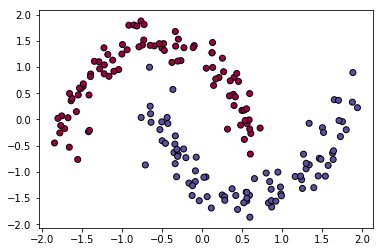

In [670]:
plt.scatter(dataset_X_train[:,0], dataset_X_train[:,1], c = dataset_Y_train[:,0], edgecolors='black', cmap=plt.cm.Spectral)

In [663]:
#params 
# 2->2Relu->1Sigmoid
params = [[2,2,relu],[2,1,sigmoid]]
deep_parameters = initialize_nn_parameters(params)

#train NN
deep_parameters = gradient_descent(deep_parameters, dataset_X_train.T, dataset_Y_train.T, 0.08, 1000)

Cost after iteration 0: 0.7516886468365828
Cost after iteration 100: 0.3479976003467392
Cost after iteration 200: 0.30662593860735926
Cost after iteration 300: 0.2862525545054026
Cost after iteration 400: 0.27695977857002907
Cost after iteration 500: 0.2710370090560534
Cost after iteration 600: 0.26616362613453876
Cost after iteration 700: 0.26190648606135025
Cost after iteration 800: 0.2581589580553056
Cost after iteration 900: 0.2539121982920704
Cost after iteration 1000: 0.2496215598298876
Cost after iteration 1000: 0.2496215598298876


In [664]:
#accuracy
prediction_test = predict(deep_parameters, dataset_X_test.T)
acc = accuracy(prediction_test, dataset_Y_test.T)
print(acc)

0.85


# Plot Decision Boundary 2D

The dcision boundary is complex for even a simple network like 2->2*Relu*->1*Sigmoid*. The only way to plot this is by including the 3rd plane Z. The idea is to generate points on the 2d grid **https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy**. Then, we can predict values for all the points the grid. Now each point in the mesh is mapped to 0 or 1 in the Z plane. Finally, we make a contour plot on the 2D surface to capture the decision boundary. 

In [672]:
def plot_decision_boundary(deep_parameters, dataset_X, dataset_Y):
    #1. We neeed max and min values for both x and y
    # Set min and max values of the grid and give it some padding
    x_min, x_max = dataset_X[:, 0].min() - 1, dataset_X[:, 0].max() + 1
    y_min, y_max = dataset_X[:, 1].min() - 1, dataset_X[:, 1].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    grid_data = np.c_[xx.ravel(), yy.ravel()] #we need ravel because xx and yy will 2D
    pred_final = predict(deep_parameters, grid_data.T)
    pred_final = pred_final.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, pred_final, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    print(dataset_Y[:,0].shape)
    plt.scatter(dataset_X[:,0], dataset_X[:,1], c = dataset_Y[:,0], edgecolors='black',cmap=plt.cm.Spectral)

(180,)


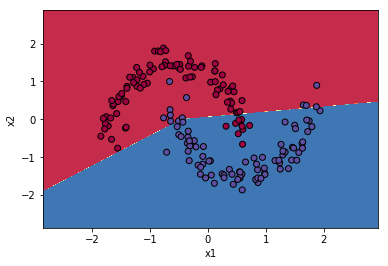

In [673]:
plot_decision_boundary(deep_parameters, dataset_X_train, dataset_Y_train)

# Trying a more complex NN on the same dataset

In [681]:
#params 
# 2->2Relu->1Sigmoid
params = [[2,20,relu],[20,10,relu],[10,2,relu],[2,1,sigmoid]]
deep_parameters = initialize_nn_parameters(params)

#train NN
deep_parameters = gradient_descent(deep_parameters, dataset_X_train.T, dataset_Y_train.T, 0.08, 1000)

Cost after iteration 0: 0.6783853307211288
Cost after iteration 100: 0.28314375670727016
Cost after iteration 200: 0.25183004414486176
Cost after iteration 300: 0.21439308991339773
Cost after iteration 400: 0.15167554576335748
Cost after iteration 500: 0.07589253024869674
Cost after iteration 600: 0.03720062353920283
Cost after iteration 700: 0.021376621541625302
Cost after iteration 800: 0.014294461403857777
Cost after iteration 900: 0.010435819920239994
Cost after iteration 1000: 0.007783813050191955
Cost after iteration 1000: 0.007783813050191955


In [682]:
#accuracy
prediction_test = predict(deep_parameters, dataset_X_test.T)
acc = accuracy(prediction_test, dataset_Y_test.T)
print(acc)

1.0


(180,)


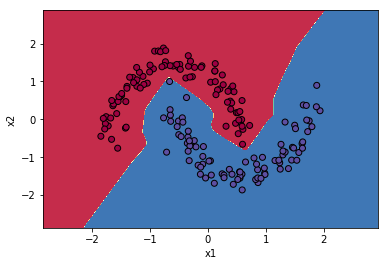

In [683]:
plot_decision_boundary(deep_parameters, dataset_X_train, dataset_Y_train)

That was overkill!!